In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

forests_global = pd.read_csv("/home/junglist/Downloads/global forests/share-global-forest.csv")

print(forests_global.head(), forests_global.dtypes, forests_global.shape)


        Entity Code  Year  Share of global forest area
0  Afghanistan  AFG  1990                     0.028525
1  Afghanistan  AFG  1991                     0.028578
2  Afghanistan  AFG  1992                     0.028631
3  Afghanistan  AFG  1993                     0.028684
4  Afghanistan  AFG  1994                     0.028738 Entity                          object
Code                            object
Year                             int64
Share of global forest area    float64
dtype: object (7846, 4)


In [2]:
#grab just continents from the data
forests_continents = forests_global.loc[(forests_global.Entity == "Oceania") | (forests_global.Entity == "Europe")| (forests_global.Entity == "Americas") | (forests_global.Entity == "Africa") | (forests_global.Entity == "South America") | (forests_global.Entity == "Asia")]
forests_continents = forests_continents[forests_continents.Year > 2009]
forests_continents.reset_index(inplace=True)
forests_continents.drop("index", axis=1, inplace=True)
forests_continents.drop("Code", axis=1, inplace=True)
#pivot table to subtract south america from Americas to get the global share of North America
forests_continents = forests_continents.pivot(index="Year", columns="Entity", values="Share of global forest area")
forests_continents["North America"] = forests_continents["Americas"] - forests_continents["South America"]
forests_continents.reset_index(inplace=True)
continents_plot= pd.melt(forests_continents, id_vars=["Year"], value_vars=["South America", "Europe", "North America", "Asia", "Oceania", "Africa"], var_name="continent", value_name="forest share")



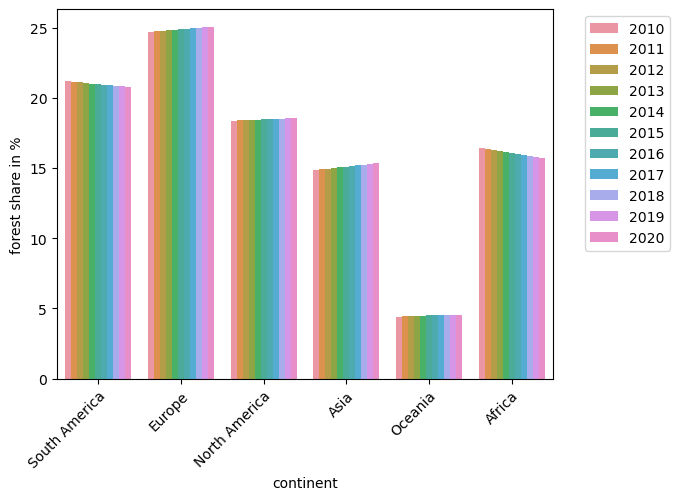

In [37]:
#barplot of all global forest share over the last 10 years
sns.barplot(data=continents_plot, x= "continent", y= "forest share", hue="Year")
plt.legend(bbox_to_anchor = (1.05, 1), loc="upper left")
plt.ylabel("forest share in %")
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.show()


In [50]:
regrowth = pd.read_csv("/home/junglist/Downloads/global forests/forest-area-primary-planted.csv")
#clean column names and variables
regrowth.rename(columns={"Planted Forest | 00006716 || Area | 005110 || thousand hectares" : "Planted forest", 'Naturally regenerating forest | 00006717 || Area | 005110 || thousand hectares' : "Naturally regenerating forest"}, inplace=True)
regrowth.Entity = regrowth.Entity.str.replace("FAO", "", regex=True)
regrowth.Entity = regrowth.Entity.str.replace("[()]", "", regex=True)
regrowth.Entity = regrowth.Entity.str.replace(" ", "", regex=True)
regrowth.drop("Code", axis=1, inplace=True)

#grab just continents and years of interest from the data
years = [1990, 1995, 2000, 2005, 2010, 2015, 2019]
continents = ["Oceania", "Asia", "Americas", "Europe", "SouthAmerica", "Africa"]
regrowth_continents = regrowth.query('Entity in @continents')
regrowth_continents = regrowth_continents.query('Year in @years')
#convert area to million hectares
regrowth_continents["Planted forest"] = regrowth_continents["Planted forest"] / 1000000
regrowth_continents["Naturally regenerating forest"] = regrowth_continents["Naturally regenerating forest"] / 1000000
#add North America
regrowth_continents.set_index(["Entity", "Year"], inplace=True)
regrowth_continents = pd.concat([regrowth_continents, pd.concat({"NorthAmerica": regrowth_continents.loc["Americas"].sub(regrowth_continents.loc["SouthAmerica"])})]).reset_index()
#drop Americas
regrowth_continents = regrowth_continents[regrowth_continents["Entity"] != "Americas"]

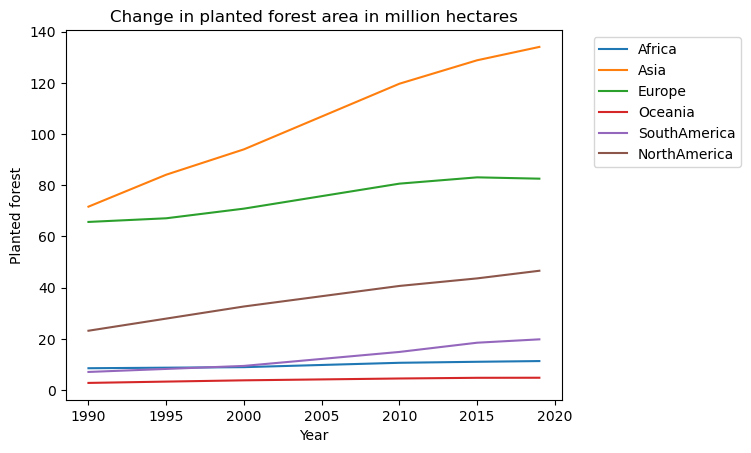

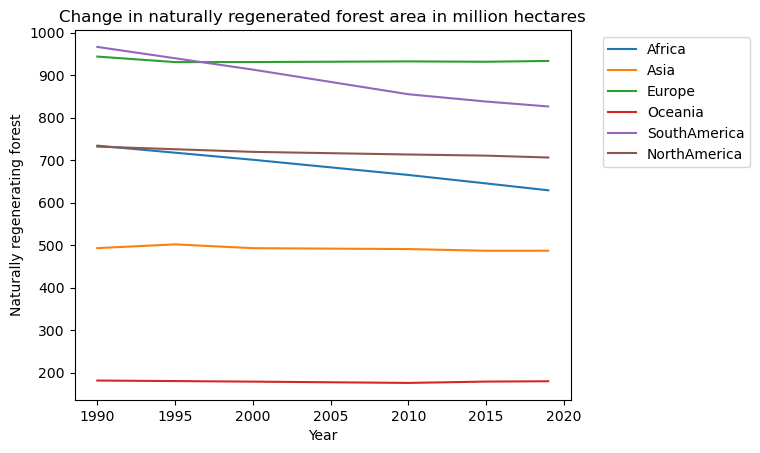

In [51]:
sns.lineplot(data = regrowth_continents, x = "Year", y= "Planted forest", hue="Entity")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Change in planted forest area in million hectares")
plt.show()
sns.lineplot(data = regrowth_continents, x = "Year", y= "Naturally regenerating forest", hue="Entity")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Change in naturally regenerated forest area in million hectares")
plt.show()

In [100]:
forest_cover = pd.read_csv("/home/junglist/Downloads/global forests/forest-area-as-share-of-land-area.csv")

forest_cover = forest_cover[forest_cover["Year"] == 2019]
forest_cover.drop("Code", axis=1, inplace=True)


In [97]:
high_low = forest_cover.nlargest(n=5, columns=["Forest cover"])
#high_low = high_low.append(forest_cover.nsmallest(n=5, columns=["Forest cover"]))
print(high_low.head(10))

             Entity  Year  Forest cover
6813       Suriname  2019     97.483115
2580  French Guyana  2019     96.682526
3074         Guyana  2019     93.596871
4463     Micronesia  2019     91.985714
2642          Gabon  2019     91.366787


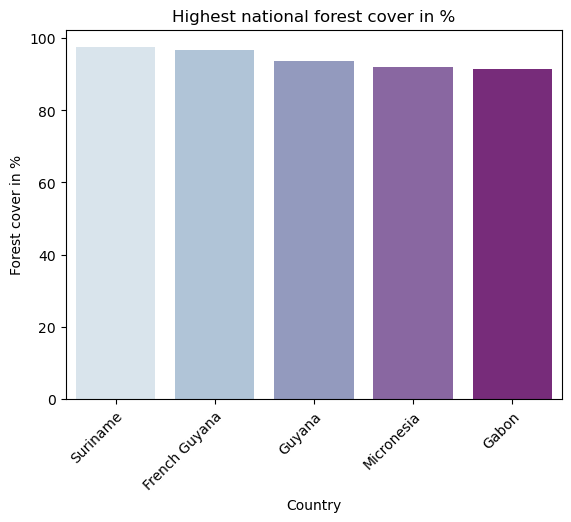

In [99]:
sns.barplot(data = high_low, x="Entity", y="Forest cover", palette="BuPu")
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.title("Highest national forest cover in %")
plt.ylabel("Forest cover in %")
plt.xlabel("Country")
plt.show()